#**Exploratory Data Analysis (EDA) E-Commerce Transactions**

##**BUSINESS UNDERSTANDING: Tujuan dan Konteks Bisnis**

###Latar Belakang

Pertumbuhan *E-commerce* yang pesat menghasilkan volume data transaksi yang besar. Data ini dapat dimanfaatkan untuk memahami pola penjualan, perilaku konsumen, serta dinamika pasar dari waktu ke waktu. Tanpa analisis yang tepat, potensi insight dari data transaksi tersebut tidak dapat dimanfaatkan secara optimal untuk pengambilan keputusan bisnis.

###Tujuan Analisis

Tujuan dari analisis ini adalah untuk melakukan Exploratory Data Analysis (EDA)
pada data transaksi e-commerce guna:

1. Miemahami karakteristik dasar data penjualan
2. Mengidentifikasi kategori produk yang dominan
3. Menganalisis hubungan antara kategori produk, harga, dan lokasi pelanggan
4. Mengamati tren penjualan dari waktu ke waktu

###Pertanyaan Bisnis

Beberapa pertanyaan utama yang ingin dijawab melalui analisis ini antara lain:

1. Bagaimana karakteristik umum transaksi e-commerce?
2. Kategori produk apa yang paling banyak terjual dan paling mahal?
3. Wilayah mana yang memiliki aktivitas transaksi tertinggi?
4. Bagaimana tren penjualan e-commerce dari waktu ke waktu?bold text


##**DATA UNDERSTANDING: Struktur, Karakteristik, dan Kualitas Data**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

orders = pd.read_csv('/content/drive/MyDrive/PORTOFOLIO/Portfolio-data/EDA/olist_orders_dataset.csv')
items = pd.read_csv('/content/drive/MyDrive/PORTOFOLIO/Portfolio-data/EDA/olist_order_items_dataset.csv')
products = pd.read_csv('/content/drive/MyDrive/PORTOFOLIO/Portfolio-data/EDA/olist_products_dataset.csv')
customers = pd.read_csv('/content/drive/MyDrive/PORTOFOLIO/Portfolio-data/EDA/olist_customers_dataset.csv')

print("\n++++++++++++++++++++\n")

orders.info()
orders.isnull().sum()

print("\n++++++++++++++++++++\n")

items.info()
items.isnull().sum()

print("\n++++++++++++++++++++\n")

products.info()
products.isnull().sum()

print("\n++++++++++++++++++++\n")

customers.info()
customers.isnull().sum()

print("\n++++++++++++++++++++\n")


++++++++++++++++++++

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

++++++++++++++++++++

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0  

Pada tahap ini dilakukan pemeriksaan awal terhadap struktur data menggunakan
fungsi `info()` dan `isnull().sum()` untuk memahami tipe data, jumlah observasi,
serta keberadaan nilai kosong pada setiap dataset.

### Dataset Orders
Dataset `orders` terdiri dari informasi transaksi pemesanan yang mencakup
order_id, status pesanan, serta waktu pemesanan dan pengiriman. Struktur data
menunjukkan bahwa mayoritas kolom memiliki tipe data yang sesuai, namun terdapat
beberapa nilai kosong pada kolom waktu tertentu yang berkaitan dengan proses
pengiriman atau pembatalan order.

### Dataset Order Items
Dataset `order_items` berisi detail produk yang terdapat pada setiap order,
termasuk harga dan biaya pengiriman. Seluruh kolom pada dataset ini terisi
dengan baik tanpa nilai kosong, sehingga data siap digunakan untuk analisis
harga dan jumlah produk per transaksi.

### Dataset Products
Dataset `products` memuat informasi kategori dan atribut produk. Terdapat nilai
kosong pada kolom `product_category_name`, yang mengindikasikan adanya produk
tanpa kategori terdefinisi. Kondisi ini perlu diperhatikan pada analisis
kategori produk agar tidak menimbulkan bias.

### Dataset Customers
Dataset `customers` berisi informasi lokasi pelanggan, termasuk kota dan state.
Struktur data relatif lengkap dan dapat digunakan untuk analisis distribusi
pelanggan berdasarkan wilayah.

### Ringkasan
1. Sebagian besar dataset memiliki struktur data yang baik dan konsisten.
2. Nilai kosong terutama ditemukan pada informasi kategori produk dan waktu
  pengiriman order.
3. Dataset siap untuk dilanjutkan ke tahap Data Cleaning sebelum analisis
  eksploratif lebih lanjut.

##**DATA CLEANING: Penanganan Missing Value dan Konsistensi Data**


In [ ]:
products.isnull().sum()

orders['order_purchase_timestamp'] = pd.to_datetime(
    orders['order_purchase_timestamp']
)

###Missing Value
Ditemukan data kosong pada kolom `product_category_name` sebanyak 610 data. Data
kosong ini tidak dihapus, karena tidak berdampak signifikan terhadap analisis
utama dan penghapusan berpotensi mengurangi informasi transaksi yang valid.

###Data Type Correction
Kolom waktu `order_purchase_timestamp` dikonversi ke format `datetime` untuk
memungkinkan timeseries analysis.

###Data Duplicate & Outlier
Tidak ditemukan duplikasi data yang signifikan pada dataset `transaksi`. Outlier
pada jumlah produk per order tidak dihapus, karena masih mencerminkan transaksi
valid. Hal ini perlu diperhatikan pada tahap analisis lanjutan.

> Secara keseluruhan, data dinilai cukup bersih dan layak digunakan untuk analisis eksploratif tanpa transformasi yang agresif.

##**UNIVARIATE ANALYSIS: Distribusi Order, Produk, dan Status Transaksi**


###Business Questions
1. Berapa total order yang terjadi?
2. Status order paling sering?
3. Distribusi jumlah produk per order?
4. Berapa banyak kategori produk yang ada?

In [ ]:
#1
total_orders = orders.shape[0]
print('Total Order = ', total_orders)

Total Order =  99441


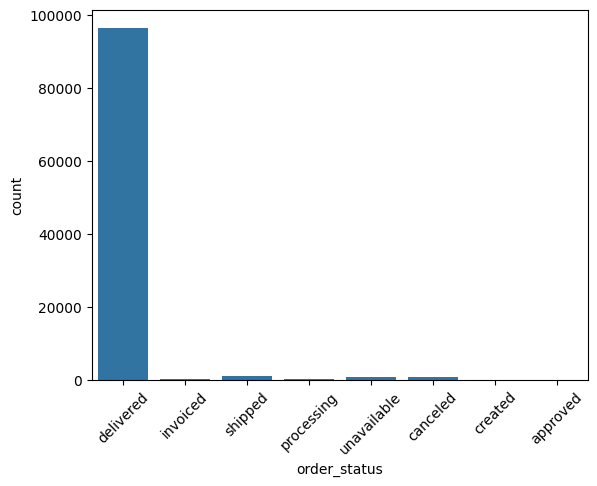

In [ ]:
#2
sns.countplot(x='order_status', data=orders)
plt.xticks(rotation=45)
plt.show()



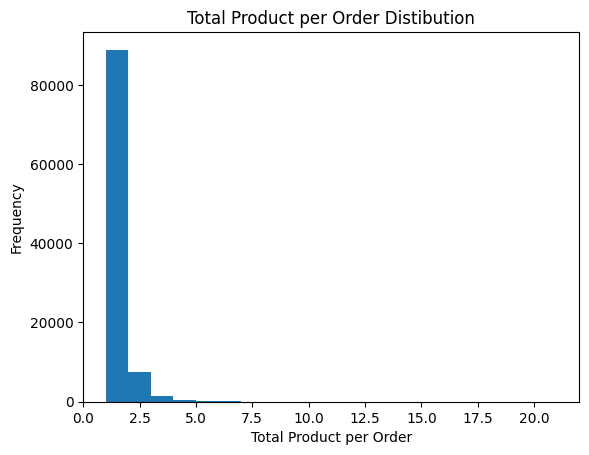

In [ ]:
#3
items_per_order = items.groupby('order_id').size()
items_per_order.head()
items_per_order.describe()

plt.hist(items_per_order, bins=20)
plt.xlabel('Total Product per Order')
plt.ylabel('Frequency')
plt.title('Total Product per Order Distibution')
plt.show()

Total Product Category =  73


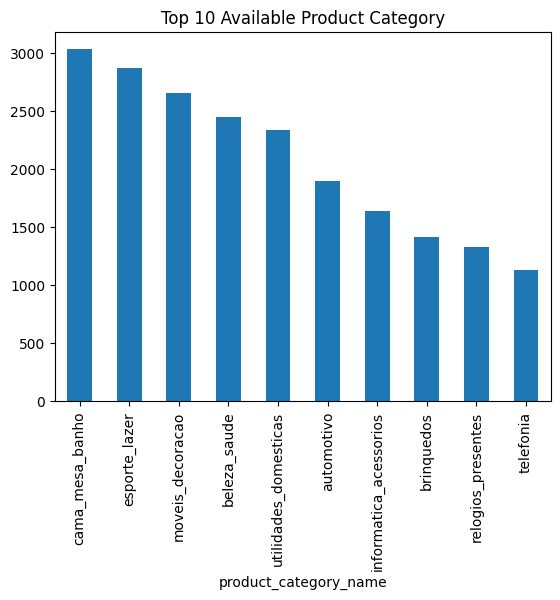

In [ ]:
#4
print('Total Product Category = ', products['product_category_name'].nunique())

products['product_category_name'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Available Product Category')
plt.show()

###HASIL UNIVARIATE ANALYSIS

Dataset mencatat `99.441` total order, menunjukkan skala transaksi e-commerce
yang besar dan representatif untuk analisis perilaku konsumen.

Mayoritas order berstatus `Delivered`(-+97%), menandakan tingkat keberhasilan pengiriman yang sangat tinggi. Jumlah order `Canceled` relatif kecil (625 order), sehingga risiko kegagalan transaksi tergolong rendah.

Terdapat 73 kategori produk, dengan kategori `cama_mesa_banho` sebagai kategori
dengan jumlah produk terbanyak. Ditemukan 610 data kosong pada kolom kategori
produk, yang perlu diperhatikan pada tahap analisis lanjutan.

Sebagian besar pelanggan membeli 1 produk per order, mengindikasikan pola
pembelian satuan. Namun, terdapat outlier dengan pembelian hingga 20 produk
dalam satu order, yang dapat merepresentasikan pembelian dalam jumlah besar
atau kebutuhan khusus.

> Kesimpulannya, Analisis univariate menunjukkan bahwa dataset e-commerce
memiliki skala transaksi yang besar dengan tingkat keberhasilan pengiriman yang
tinggi. Produk tersebar dalam berbagai kategori dengan dominasi produk kebutuhan
rumah tangga. Pola pembelian pelanggan cenderung satuan, meskipun terdapat
sebagian kecil transaksi dengan jumlah produk yang sangat besar.

##**BIVARIATE ANALYSIS: Hubungan Kategori Produk, Harga, dan Wilayah**

###Business Questions
5. Kategori produk apa yang paling banyak terjual?
6. Apakah ada kategori dengan harga rerata paling mahal?
7. Kota (state) mana yang memiliki jumlah order terbanyak?


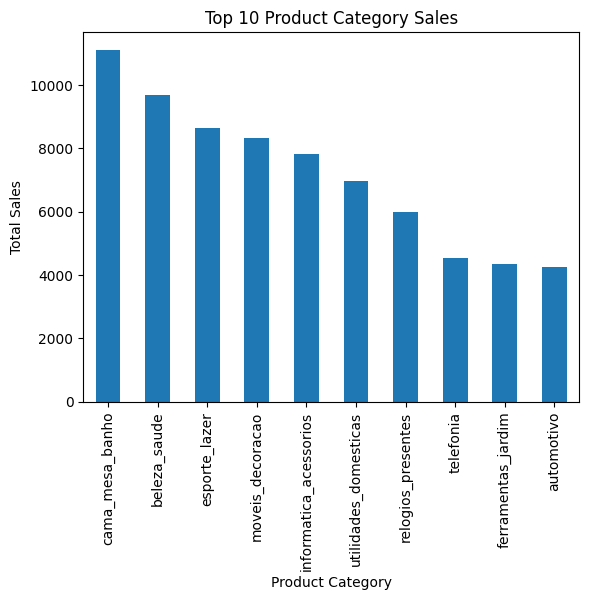

In [ ]:
#5
items_products = items.merge(products, on='product_id')
items_products.head()

category_sales = (
    items_products
    .groupby('product_category_name')
    .size()
    .sort_values(ascending=False)
)

category_sales.head(10).plot(kind='bar')
plt.title('Top 10 Product Category Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

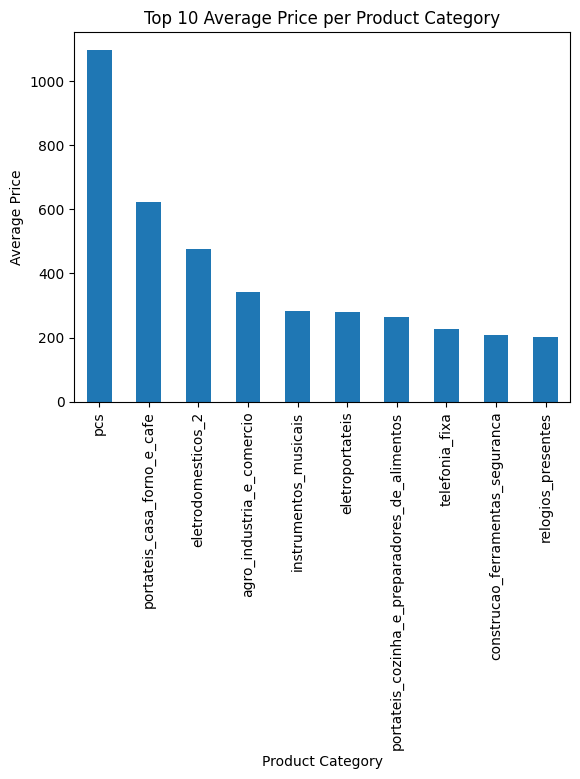

In [ ]:
items_products = items.merge(products, on='product_id')
items_products.head()

items_products['price'].describe()

avg_price_category = (
    items_products
    .groupby('product_category_name')['price']
    .mean()
    .sort_values(ascending=False)
)

avg_price_category.head(10).plot(kind='bar')
plt.title('Top 10 Average Price per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.show()

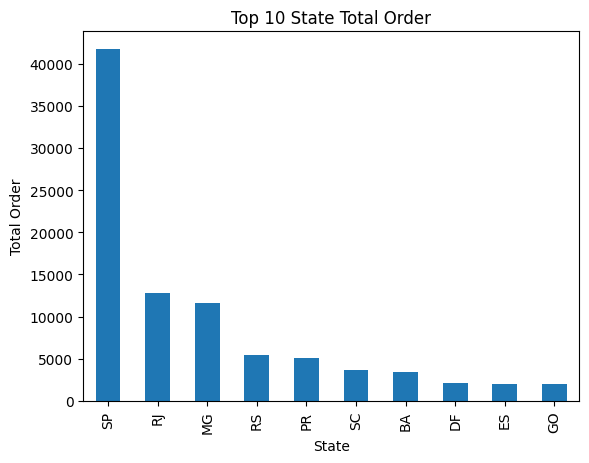

In [ ]:
order_customers = orders.merge(customers, on='customer_id')
order_customers.head()

state_order = (
    order_customers
    .groupby('customer_state')
    .size()
    .sort_values(ascending=False)
)

state_order.head(10).plot(kind='bar')
plt.title('Top 10 State Total Order')
plt.xlabel('State')
plt.ylabel('Total Order')
plt.show()

###HASIL BIVARIATE ANALYSIS

`cama_mesa_banho` merupakan kategori produk terlaris, yang menunjukkan tingginya
minat konsumen terhadap produk kebutuhan rumah tangga pada platform *e-commerce*
ini. Kategori terlaris tersebut juga sejalan dengan kategori produk terbanyak
yang tersedia, meskipun terdapat perbedaan komposisi kategori pada peringkat
kedua hingga kesepuluh.

Kategori `pcs` memiliki harga rata-rata tertinggi dibandingkan kategori lainnya.
Namun, meskipun memiliki harga yang tinggi, kategori ini tidak termasuk dalam
kategori dengan jumlah penjualan terbanyak. Hal ini mengindikasikan bahwa
produk pada kategori tersebut merupakan produk premium dengan segmentasi pasar
tertentu, bukan produk mass market.

State `São Paulo` (SP) memiliki jumlah order tertinggi dengan selisih yang cukup
signifikan dibandingkan state lainnya. Hal ini menunjukkan tingginya aktivitas
transaksi *e-commerce* di wilayah tersebut, yang kemungkinan dipengaruhi oleh
kepadatan penduduk, tingkat urbanisasi, serta daya beli masyarakat yang lebih
tinggi dibandingkan wilayah lain.

>Kesimpulannya, Berdasarkan Analisis Bivariate, produk kebutuhan rumah tangga

*   List item
*   List item


menjadi kontributor utama penjualan, sementara produk dengan harga tinggi
cenderung memiliki volume transaksi lebih rendah. Selain itu, aktivitas
e-commerce terpusat pada wilayah dengan tingkat ekonomi dan populasi yang
tinggi, seperti São Paulo.

##**TIMESERIES ANALYSIS: Tren Order Bulanan dari Waktu ke Waktu**

###Business Questions
8. Bagaimana tren jumlah order per bulan?
9. Apakah ada bulan dengan lonjakan transaksi?

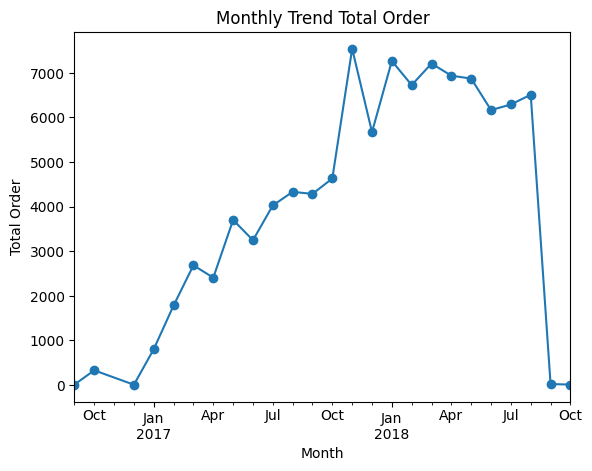

In [ ]:
#8
orders.dtypes
orders['order_month'] = orders['order_purchase_timestamp'].dt.to_period('M')
orders['order_purchase_timestamp'].head(10)

monthly_orders = (
    orders
    .groupby('order_month')
    .size()
)

monthly_orders.plot(kind='line', marker='o')
plt.title('Monthly Trend Total Order')
plt.xlabel('Month')
plt.ylabel('Total Order')
plt.show()

###Hasil Timeseries Analysis

Tren penjualan menunjukkan peningkatan bertahap dari waktu ke waktu, dengan
lonjakan signifikan pada Oktober 2017 dan mencapai puncak tertinggi pada
November 2017 sebanyak `7.544 order`. Setelah periode puncak tersebut, terlihat
penurunan secara bertahap hingga Agustus 2018, sebelum mengalami penurunan yang
cukup drastis pada September 2018.

>Pola ini mengindikasikan adanya faktor musiman atau perubahan kondisi pasar
yang memengaruhi aktivitas transaksi *e-commerce* dalam periode tertentu.

##**CONCLUSION & BUSINESS RECOMENDATIONS**

###CONCLUSION

Berdasarkan hasil Exploratory Data Analysis yang telah dilakukan, dapat
disimpulkan bahwa platform e-commerce ini memiliki skala transaksi yang besar
dengan tingkat keberhasilan pengiriman yang tinggi. Produk kebutuhan rumah
tangga menjadi kontributor utama penjualan, sementara produk dengan harga tinggi
cenderung memiliki volume transaksi yang lebih rendah. Aktivitas transaksi juga
menunjukkan konsentrasi yang kuat pada wilayah tertentu serta pola tren
penjualan yang dipengaruhi oleh faktor waktu.

Analisis ini memberikan gambaran awal yang komprehensif mengenai kondisi
bisnis e-commerce dan dapat menjadi dasar untuk analisis lanjutan maupun
pengambilan keputusan strategis.

> Insight ini dapat membantu tim bisnis dalam menentukan fokus kategori produk,
strategi wilayah pemasaran, serta antisipasi lonjakan permintaan musiman.

###RECOMENDATIONS
Berdasarkan insight yang diperoleh, beberapa rekomendasi yang dapat
dipertimbangkan adalah:

1. Fokus pada kategori produk kebutuhan rumah tangga
Kategori dengan volume penjualan tinggi dapat dijadikan fokus promosi dan
pengelolaan stok untuk menjaga stabilitas pendapatan.

2. Strategi khusus untuk produk premium
Produk dengan harga rata-rata tinggi sebaiknya dipasarkan dengan pendekatan yang
 lebih tersegmentasi, seperti promosi eksklusif atau bundling bernilai tinggi.

3. Optimalisasi pasar di wilayah dengan transaksi tinggi
Wilayah dengan jumlah order terbesar dapat menjadi prioritas dalam peningkatan
layanan logistik dan kampanye pemasaran.

4. Antisipasi tren musiman
Pola kenaikan dan penurunan penjualan dari waktu ke waktu menunjukkan perlunya
strategi bisnis yang adaptif terhadap faktor musiman atau perubahan kondisi pasar.

5. Pengembangan analisis lanjutan
Analisis selanjutnya dapat mencakup faktor promosi, metode pembayaran, atau
segmentasi pelanggan untuk memperoleh insight yang lebih mendalam.